In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import missingno as msno
from pandas_profiling import ProfileReport
from collections import Counter
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
sns.set_theme(style = 'darkgrid', palette = 'pastel')

/kaggle/input/netflix-shows/netflix_titles.csv


In [5]:
df_net = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

In [6]:
df_net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df_net.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [9]:
df_net.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

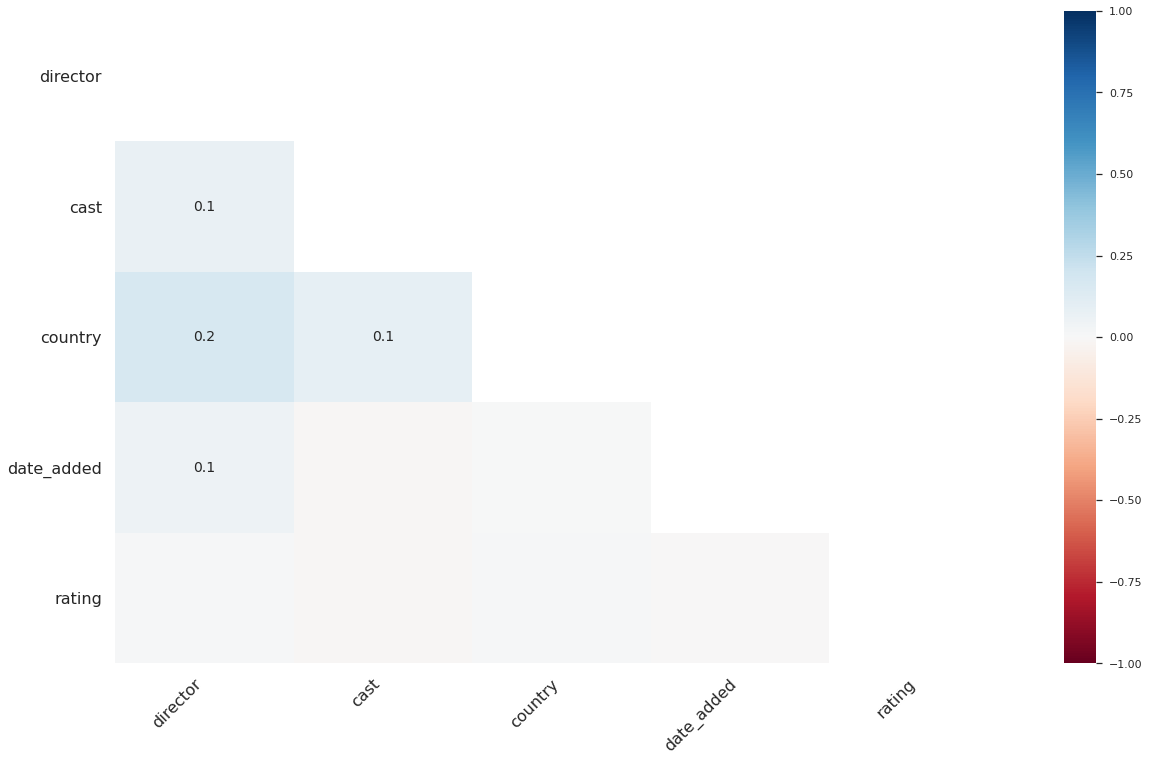

In [10]:
msno.heatmap(df_net)

In [11]:
ProfileReport(df_net)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
df_net.drop(['director', 'date_added', 'description'], axis = 1, inplace =  True)

In [13]:
df_net[df_net['rating'].isna()]

,show_id,type,title,cast,country,release_year,rating,duration,listed_in
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,"Oprah Winfrey, Ava DuVernay",NaN,2017,NaN,37 min,Movies
2359,s2360,TV Show,Gargantia on the Verdurous Planet,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2013,NaN,1 Season,"Anime Series, International TV Shows"
3660,s3661,TV Show,Little Lunch,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2015,NaN,1 Season,"Kids' TV, TV Comedies"
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,United States,2017,NaN,74 min,Movies
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,2010,NaN,84 min,Movies
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,2015,NaN,66 min,Movies
4323,s4324,Movie,My Honor Was Loyalty,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2015,NaN,115 min,Dramas


In [14]:
changing_nan = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}
for id, rate in changing_nan.items():
    df_net.iloc[id, 6] = rate
df_net['rating'].isna().sum()

0

In [15]:
df_net = df_net[df_net['cast'].notna()]
df_net['cast'].isna().sum()

0

In [16]:
Counter(df_net['country']).most_common(1)

[('United States', 2251)]

In [17]:
df_net['country'] = df_net['country'].fillna('United States')
df_net['country'].isna().sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

In [18]:
df_net['main_country'] = df_net['country'].apply(lambda x:x.split(',')[0])
df_net.drop('country',axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
df_net.head()

,show_id,type,title,cast,release_year,rating,duration,listed_in,main_country
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Brazil
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2016,TV-MA,93 min,"Dramas, International Movies",Mexico
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",2011,R,78 min,"Horror Movies, International Movies",Singapore
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",United States
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",2008,PG-13,123 min,Dramas,United States


In [20]:
df_net.isna().sum()

show_id         0
type            0
title           0
cast            0
release_year    0
rating          0
duration        0
listed_in       0
main_country    0
dtype: int64

Total actors in US netflix is13772


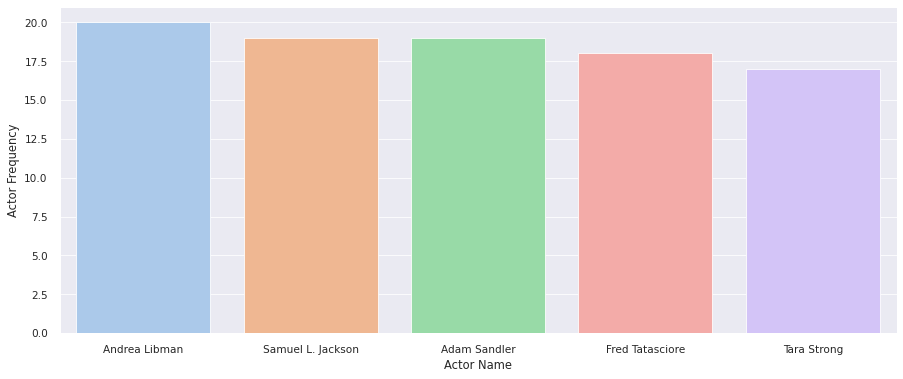

In [21]:
df_us = df_net[df_net['main_country'] == 'United States']
actor_list = [(lambda x:x)(x.strip()) for x in ','.join(df_us['cast']).split(',')]
counter_list = Counter(actor_list).most_common(5)
actor_name = [(lambda x:x)(x[0]) for x in counter_list]
actor_frequency = [(lambda x:x)(x[1]) for x in counter_list]
us_actor = pd.DataFrame({'actor_name': actor_name,'actor_frequency' : actor_frequency}, columns = ['actor_name', 'actor_frequency'])
my_set= set(actor_list)
print("Total actors in US netflix is" + str(len(my_set)))
plt.figure(figsize=(15,6))
sns.set_context('paper', font_scale=1.2)
sns.barplot(x='actor_name', y='actor_frequency', data=us_actor)
plt.xlabel('Actor Name')
plt.ylabel('Actor Frequency')
plt.show()

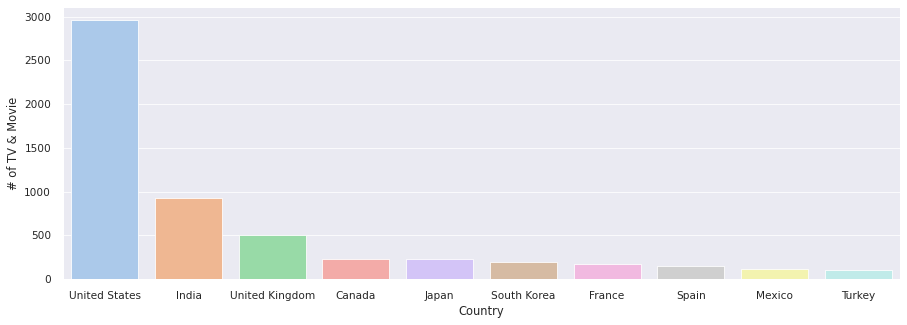

In [23]:
count_type = df_net.groupby(['main_country']).count()
most_country = count_type['type'].to_frame().reset_index().sort_values(by='type',ascending=False)[:10]
plt.figure(figsize=(15,5))
sns.set_context('paper',font_scale=1.2)
sns.barplot(x='main_country',y='type', data=most_country)
plt.ylabel('# of TV & Movie')
plt.xlabel('Country')
plt.show()

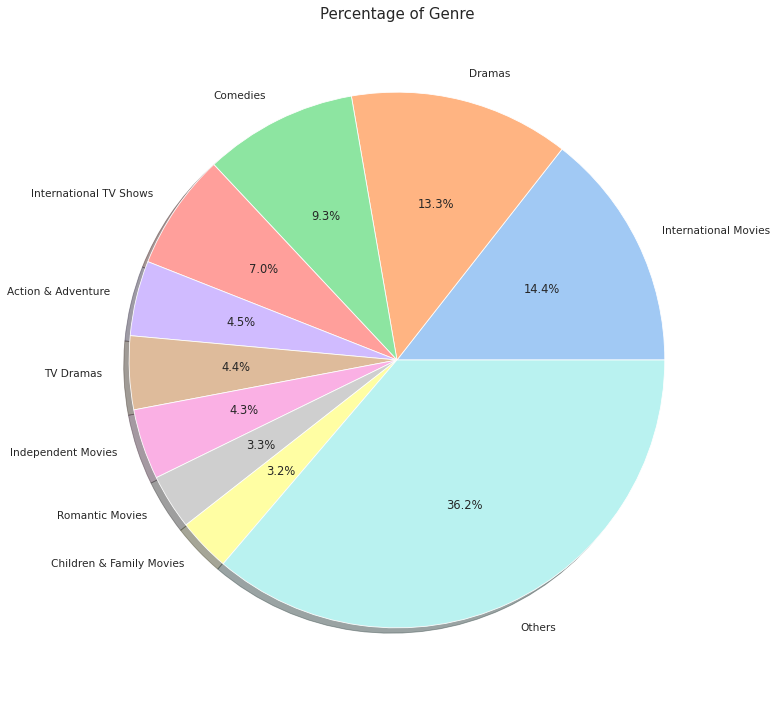

In [24]:
#Extract most 10 genre from netflix to visualize the percentage of genre
top9_genre = [(lambda x: x)(x.strip()) for x in ','.join(df_net['listed_in']).split(',')]
top9_list = list(Counter(top9_genre).most_common(9))
total_genre=len(top9_genre)
labels = [(lambda x:x)(x[0]) for x in top9_list]
labels.append('Others')
sizes = [(lambda x:x)(x[1]) for x in top9_list]
sizes.append(total_genre - sum(sizes))

#Visualizing using matplotlib
plt.figure(figsize=(12,15))
plt.title('Percentage of Genre', fontsize=15)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

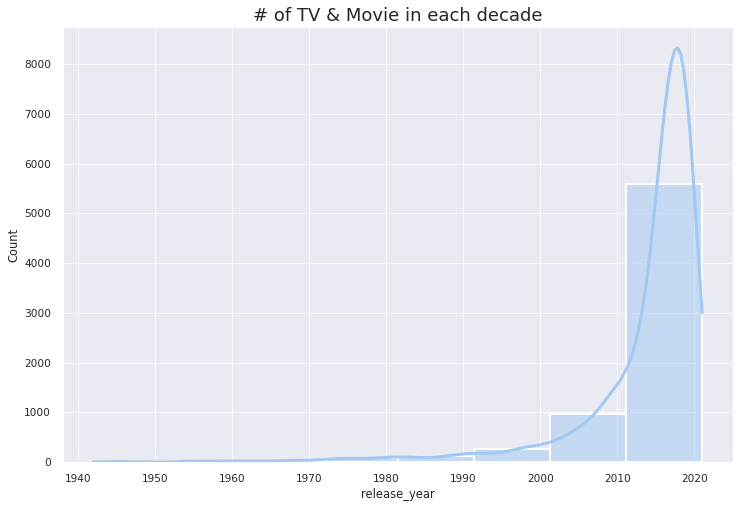

In [25]:
#Visualizing using matplotlib
plt.figure(figsize=(12,8))
plt.title('# of TV & Movie in each decade', fontsize=18)
sns.set_context("poster", font_scale = 0.8)
sns.histplot(df_net['release_year'], bins=8, kde=True)
plt.show()

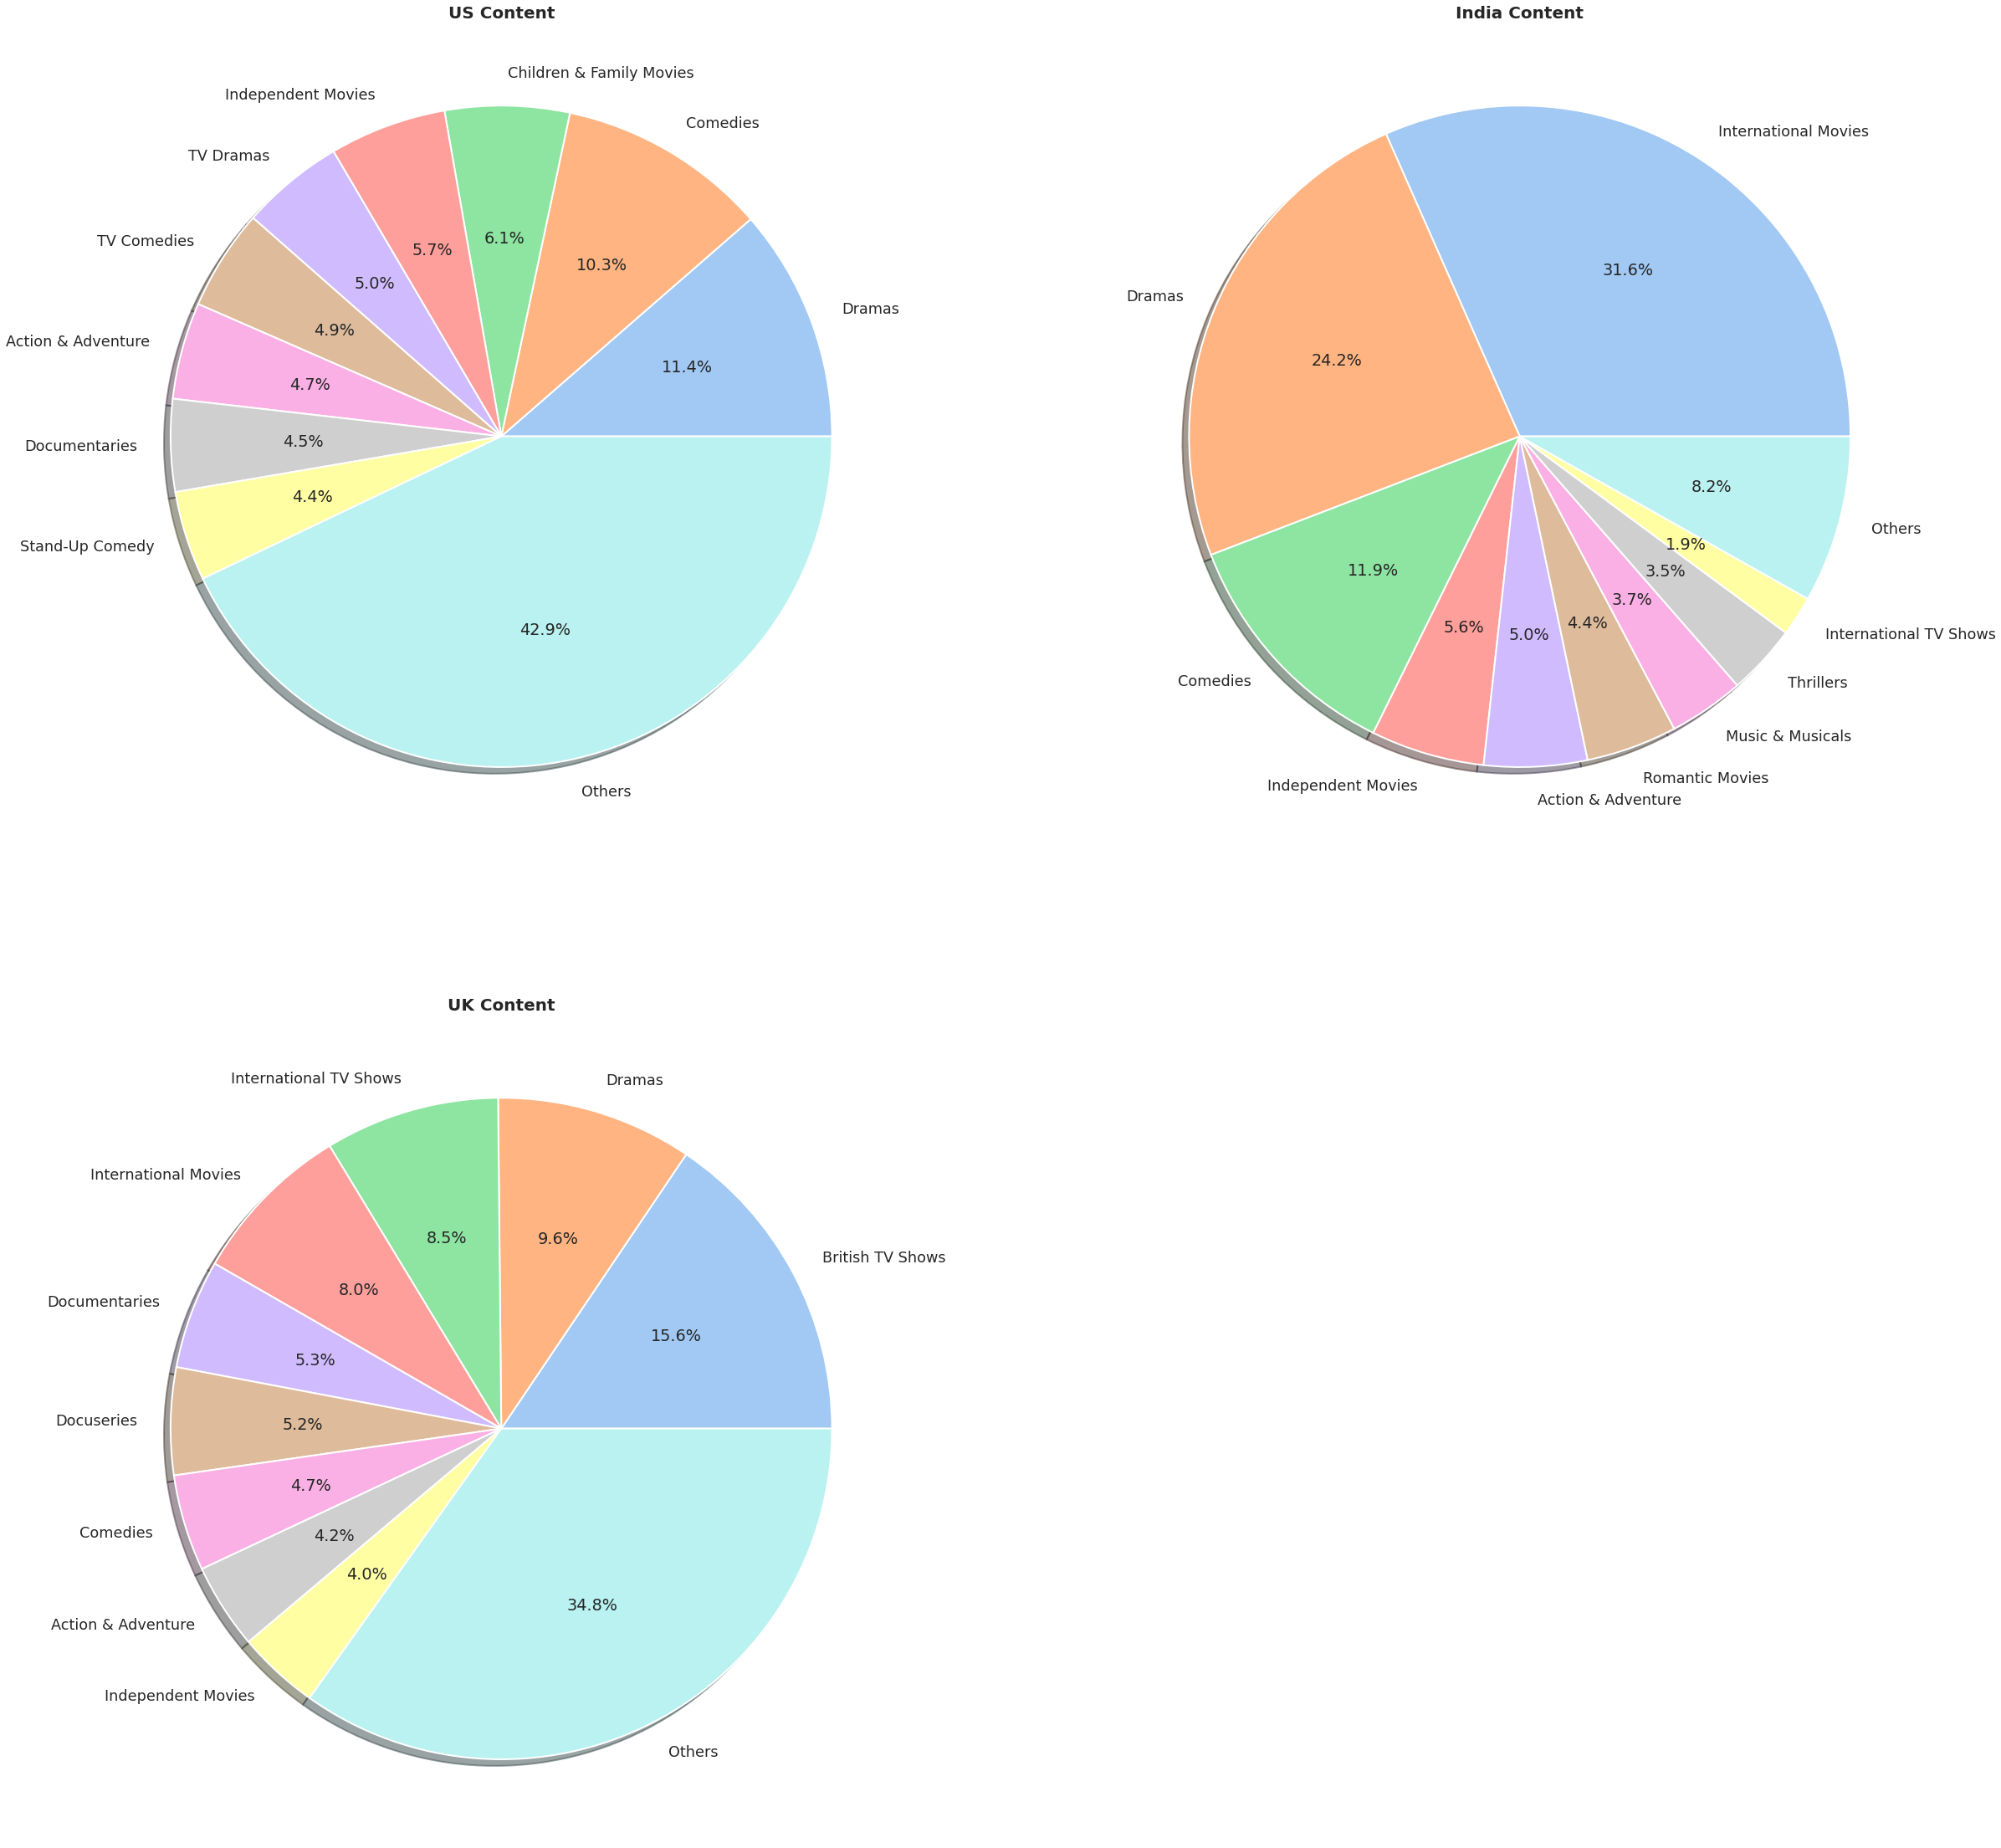

In [26]:
#Make new dataframe for each country
df_US = df_net[df_net['main_country'] == 'United States']
df_In = df_net[df_net['main_country'] == 'India']
df_UK = df_net[df_net['main_country'] == 'United Kingdom']

#Function which return sizes and labels for pie chart
def show_pie(df):
    genre = [(lambda x: x)(x.strip()) for x in ','.join(df['listed_in']).split(',')]
    df_list = list(Counter(genre).most_common(9))
    total_genre=len(genre)
    labels = [(lambda x:x)(x[0]) for x in df_list]
    labels.append('Others')
    sizes = [(lambda x:x)(x[1]) for x in df_list]
    sizes.append(total_genre - sum(sizes))
    return sizes, labels

#Get the sizes and labels
US_sizes, US_labels = show_pie(df_US)
In_sizes, In_labels = show_pie(df_In)
UK_sizes, UK_labels = show_pie(df_UK)

#Visualizing using matplotlib
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(40,40))
ax1.pie(US_sizes, labels=US_labels, autopct='%1.1f%%', shadow=True)
ax1.set_title('US Content', size=20, fontweight='bold')
ax2.pie(In_sizes, labels=In_labels, autopct='%1.1f%%', shadow=True)
ax2.set_title('India Content', size=20, fontweight='bold')
ax3.pie(UK_sizes, labels=UK_labels, autopct='%1.1f%%', shadow=True)
ax3.set_title('UK Content', size=20, fontweight='bold')
#Dummy
ax4.pie(UK_sizes, labels=UK_labels, autopct='%1.1f%%', shadow=True)
ax4.set_visible(False)
plt.show()

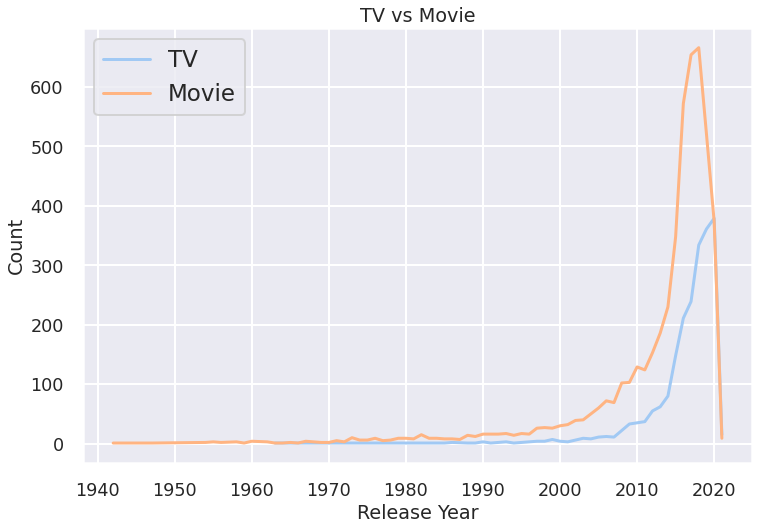

In [27]:
#Making new dataframe to seperate TV & Movie
df_TV = df_net[df_net['type']=='TV Show'].groupby('release_year').count()
df_Movie = df_net[df_net['type']=='Movie'].groupby('release_year').count()

#Visualizing using matplotlib
plt.figure(figsize=(12,8))
sns.set_context("poster", font_scale = 0.8)
sns.lineplot(data=df_TV['show_id'], sizes=10)
sns.lineplot(data=df_Movie['show_id'])
plt.ylabel('Count')
plt.xlabel('Release Year')
plt.legend(['TV', 'Movie'], fontsize='large')
plt.title('TV vs Movie')
plt.show()